<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/12.%20PCA%20on%20Images/3_Eign_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli = datasets.fetch_olivetti_faces()

In [3]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oli['data'].shape

(400, 4096)

In [5]:
oli['images'].shape

(400, 64, 64)

data is nothing but flatterned images. that is, 2d arr of 64*64 is converted into 1d of 4096

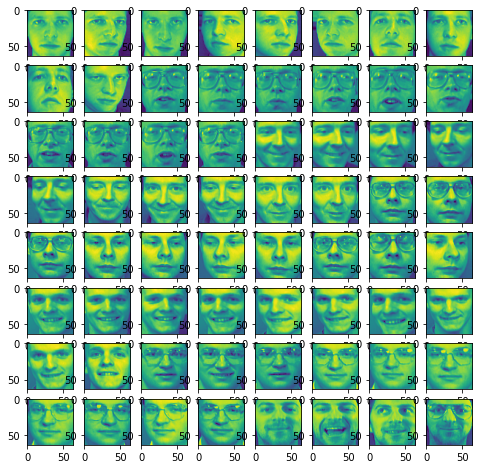

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(oli.images[i])
plt.show();

first 10 images are of same person, next 10 and so on. 

In [7]:
 X = oli.data
 Y = oli.target

In [8]:
pca = PCA()
X_transformed = pca.fit_transform(X)

In [9]:
pca.components_.shape

(400, 4096)

so no of components are not n in m*n. It is smaller of both. and each component has vector in n-d. so component shape is (m||n,n)

In [10]:
k = 0
total = pca.explained_variance_.sum()
sum = 0
while sum/total < 0.95:
  sum += pca.explained_variance_[k]
  k+=1
k

123

In [12]:
pca = PCA(n_components=k,whiten=True)
X_transformed = pca.fit_transform(X)
X_transformed.shape

(400, 123)

so we have come done to 123 features from 4096. Keeping 95% of information.

Inverse on PCA

In [17]:
X_approx = pca.inverse_transform(X_transformed)
X_approx = X_approx.reshape((400,64,64))

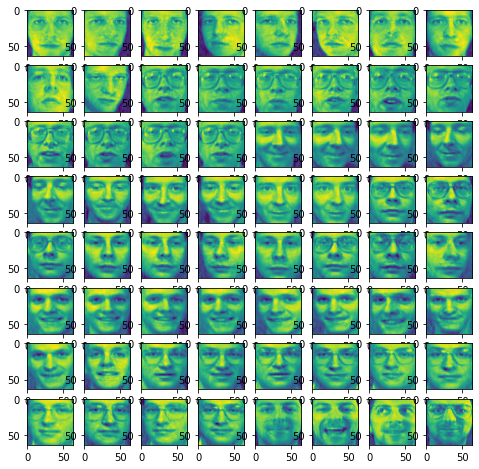

In [18]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(X_approx[i])
plt.show();

Eign Faces : each component was having a n-d arr. now ploting each component

In [19]:
eign_vector = pca.components_
eign_vector.shape

(123, 4096)

In [20]:
eignFaces = eign_vector.reshape((123,64,64))

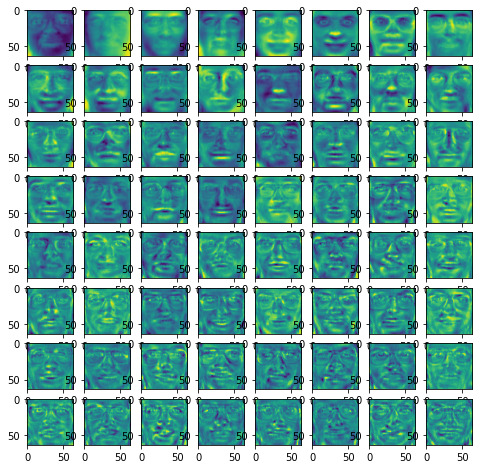

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(eignFaces[i])
plt.show();

this shows that each component was focusing on some part of the face. Like component-6 is descibing the eyes and lips on someones face etc.